In [24]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # para normalizar los datos
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import numpy as np

**Cargue de datos y separacióón de features, etiqueta**

In [3]:
iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

In [26]:
print('Etiquetas de clase:', np.unique(y))

Etiquetas de clase: [0 1 2]


**Separar datos en entrenamiento y pruebas**

In [8]:
# random_state=1 => semilla aleatoria fija
# stratify=y => Devolver los subconjuntos de entrenamiento y pruebas con las mismas proporiciones. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [27]:
print('Cantidad etiquetas en y:', np.bincount(y))
print('Cantidad etiquetas en y_train:', np.bincount(y_train))
print('Cantidad etiquetas en y_test:', np.bincount(y_test))

Cantidad etiquetas en y: [50 50 50]
Cantidad etiquetas en y_train: [35 35 35]
Cantidad etiquetas en y_test: [15 15 15]


**Normalización de los datos**

In [12]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

**Entrenar el perceptron**

In [18]:
ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

**Predecir**

In [28]:
y_pred = ppn.predict(X_test_std)
print('Muestras mal clasificadas: %d' % (y_test != y_pred).sum())

Muestras mal clasificadas: 1


**Cual es la presición del perceptron**

In [29]:
print('Presición: %.2f' % accuracy_score(y_test, y_pred))

Presición: 0.98


In [30]:
print('Presición: %.2f' % ppn.score(X_test_std, y_test))

Presición: 0.98


**Regiones de desición**

In [31]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # Generador de marcadores y colores.
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # superficie
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')


**Graficar con datos estandarizados**

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.


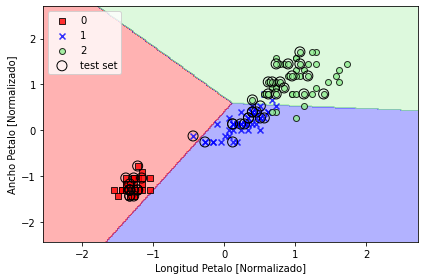

In [32]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('Longitud Petalo [Normalizado]')
plt.ylabel('Ancho Petalo [Normalizado]')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/03_01.png', dpi=300)
plt.show()